## 抓取 StockQ 的資料

In [8]:
import requests
res = requests.get('http://www.stockq.org/market/msci.php')
#res.text

In [10]:
type(res)

requests.models.Response

## 抓取圖片,PDF 等相關檔案

In [3]:
imgurl = 'https://img.appledaily.com.tw/images/thumbnail/other/919520503484e060d3bae38780c520a5.jpg'
with open('appledaily.jpg', 'wb') as f:
    res = requests.get(imgurl)
    f.write(res.content)

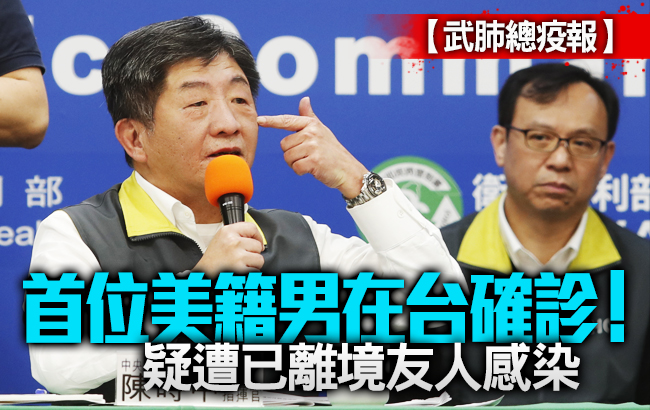

In [4]:
from PIL import Image
Image.open('appledaily.jpg')

In [6]:
docurl = 'https://doc.twse.com.tw/pdf/201901_2881_AI1_20200313_150707.pdf'
with open('2881.pdf', 'wb') as f:
    res = requests.get(docurl)
    f.write(res.content)

## BeautifulSoup

In [9]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'lxml')
print(soup.text)




Hello World
This is link1
This is link2




In [11]:
type(soup)

bs4.BeautifulSoup

In [13]:
h1 = soup.select_one('h1')
h1

<h1 id="title">Hello World</h1>

In [14]:
type(h1)

bs4.element.Tag

In [15]:
h1.text

'Hello World'

In [16]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [17]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [18]:
soup.select('h1')

[<h1 id="title">Hello World</h1>]

In [19]:
# id => #
soup.select('#title')

[<h1 id="title">Hello World</h1>]

In [20]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

## PDFMiner3K

In [25]:
! pip install --upgrade pdfminer3k

Requirement already up-to-date: pdfminer3k in /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages
Requirement already up-to-date: ply>=3.4 in /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages (from pdfminer3k)
    100% |████████████████████████████████| 256kB 665kB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 1.6MB/s ta 0:00:011
Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 51kB 3.2MB/s ta 0:00:011
Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 71kB 848kB/s ta 0:00:011
  Found existing installation: py 1.7.0
    Uninstalling py-1.7.0:
      Successfully uninstalled py-1.7.0
  Found existing installation: wcwidth 0.1.7
    Uninstalling wcwidth-0.1.7:
      Successfully uninstalled wcwidth-0.1.7
  Found existing installation: zipp 0.6.0
    Uninstalling zipp-0.6.0:
      Successfully uninstalled zipp-0.6.0
  Found existing installation: importlib

In [27]:
! pip install pycrypto

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:

from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine

s = ''
fp = open('/Users/davidchiu/Desktop/2881_2.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        print(lt_obj.get_text())
    break
        #print(lt_obj)
        #if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
        #    s = s + lt_obj.get_text()

股票代碼：2881

富邦金融控股股份有限公司及子公司

合併財務報告暨會計師核閱報告

民國一○八年及一○七年第一季

公 司 地 址：台北市建國南路一段237號

電　　　話：(02)6636-6636

〜1〜



In [30]:

from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine

s = ''
fp = open('/Users/davidchiu/Desktop/591pdf.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        print(lt_obj.get_text())
    break
        #print(lt_obj)
        #if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
        #    s = s + lt_obj.get_text()

detail_url search_date source trading_type listing_id

title

address

0
1
2
3
4
5
6
7
8

https://rent.591.com.tw/rent-detail-8719810.html
2020-02-08
591 rent
8719810 *促!公司/個人信件代收1000元*
https://rent.591.com.tw/rent-detail-8779902.html
2020-02-09
591 rent
https://rent.591.com.tw/rent-detail-8793594.html
2020-02-07
591 rent
https://rent.591.com.tw/rent-detail-8774579.html
2020-02-09
591 rent
https://rent.591.com.tw/rent-detail-8507852.html
2020-02-05
591 rent
8507852 鼎山街三角窗1F+B1店面(寶雅百貨旁)
https://rent.591.com.tw/rent-detail-8763293.html
2020-02-07
591 rent
8763293 大型車位+B1+24小時管理員
https://rent.591.com.tw/rent-detail-8744830.html
2020-02-08
591 rent
https://rent.591.com.tw/rent-detail-8712057.html
2020-02-07
591 rent
https://rent.591.com.tw/rent-detail-4779645.html
2020-02-09
591 rent
4779645 中信銀後面公園旁(33)

新北市永和區永貞路
8779902 鄰苗中、苗商、建台、縣市機關(包水電)
苗栗縣苗栗市莊敬街142號
8793594 近楠梓加工區.海科大新優質美套房
高雄市楠梓區益群路9巷16號
8774579 房東及時服務、安靜，採光充足的好住宿地
台南市永康區大灣路942巷388弄30號
高雄市三民區鼎山街310號
台北市士林區中正路116號
8744830 西門町車位出租台北市

AttributeError: 'LTRect' object has no attribute 'get_text'

## BeautifulSoup

In [31]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'lxml')
#print(soup.text)


In [32]:
soup.select_one('h1#title')

<h1 id="title">Hello World</h1>

In [33]:
soup.select_one('body h1')

<h1 id="title">Hello World</h1>

In [34]:
soup.select_one('body #title')

<h1 id="title">Hello World</h1>

In [35]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [38]:
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [39]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [40]:
soup.select('body .link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [41]:
for a in soup.select('body a.link'):
    print(a.text)

This is link1
This is link2


In [42]:
for a in soup.select('body a.link'):
    print(a.get('href'))

#
# link2


In [44]:
import requests
res = requests.get('http://www.stockq.org/market/msci.php')
#res.text

In [45]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [50]:
#for tr in soup.select('table.marketdatatable tr'):
#    print(tr.select_one('td').text)
    

## 小任務
- 請幫我取得這一頁 (https://tw.appledaily.com/life/20200313/6DUPN6FPWKHOGSZ7O3LCVT44AM/)
的標題